<a href="https://colab.research.google.com/github/lelax/D_Sign_Data/blob/main/D_Sign_Data_Doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:Tomato;">Data Science course of DHDK university program - Academic year 2021-2022</h2>

<h1>D_Sign_Data Notebook</h1>
<h3><i>Descriptive document of the final project work</i></h3>

<em>Camila Oliveira, Anita Vishinskaite, Marida Di Lembo</em>

<h2>The Context</h2>

<blockquote>The goal of the project is to develop a software that enables one to process data stored in different formats and to upload them into two distinct databases to query these databases simultaneously according to predefined operations. </blockquote>
<br>
<p>We have been analysing the project requirements and the data provided and assigned a different task to each of us for the development activity</p>
<p>Basically we splitted in two groups: one focused on the relational database and the other on the graph database.</p>
<p>The tasks were developed in the following way:<p>
    <ul>
        <li>Camila Oliveira: Relational Processor, Relational Data Processor and Relational Query Processor</li>
        <li>Anita Vishinskaite: Triple Store Processor, Triple Store Data Processor</li>
        <li>Marida Di Lembo: Triple Store Query Processor, Generic Query Data Processor</li>
</ul>
<p><em>Initially the group was composed of four members, at the end we remained in three.</em></p>

<h3>Tools and collaboration environment</h3>

<p>First of all we have been setting up our Github Repository: <a href="https://github.com/lelax/D_Sign_Data">https://github.com/lelax/D_Sign_Data</a> and shared access to it in order to be able to upload the material and syncronize it in real time.</p>
<p>Then we have been also evaluating between Jupyter and Google Colab and we finally decided to use Jupyter for the documentation report.</p>

<h4><em>What you will find in the repository?</em></h4>

<ul>
    <li>A folder called <b>import</b> where we have copied the .csv and .json files provided</li>
    <li>A folder called <b>URIref</b> where we have created additional classes</li>
    <li>The <b>impl.py</b> Python file, where all the relational data base has been defined</li>
    <li>The <b>graph_01.py</b> Python file, where all the graph data base has been defined</li>
    <li>A file for the SPARQL queries</li>
    <li>A file for the Generic Query Processor </li>
</ul>

<h2>The Relational Workflow</h2>

In the <em>impl.py</em> file we have been developing the code for the creation of a relational workflow of the data model requested and the data provided.
<p>The libraries imported and used are the following:</p>

In [ ]:
import pandas as pd
import sqlite3
from sqlite3 import connect
from pandas import read_csv
from pandas import Series
from pandas import read_sql
from pandas import read_json
from pandas import DataFrame
from csv import reader
from pandas import merge
from json import dump
from csv import reader

<h2>UML of data model classes<h2>

<p>The following classes were created as well as their methods as specified in the model:</p>
<ul>
    <li><b>Identifiable Entity:</b> being the super class</li>
    <li>Person</li>
    <li>Publication</li>
    <li>Venue</li>
    <li>Oragnization</li>
    <li>Journal Article</li>
    <li>Book Chapter</li>
    <li>Proceedings Paper</li>
    <li>Journal</li>
    <li>Book</li>
    <li>Proceedings</li>
</ul>

<h2>Class Relational Processor</h2>

<p>From the Relational Processor class the attributes getDbPath and setDbPath can be used to return the path of the database and enable a new database path. Those are used in the following way:</p>

In [ ]:
rel_path = "relational.db"
rel_dp = RelationalDataProcessor(rel_path)

<em>It's important to use them in the order described. </em> 

<h2>Class Relational Data Processor</h2>

<p>In this class you'll be able to find the uploadData method in which allows one to upload data, either in CSV or JSON file, into the database previously created with the methods from the Relational Processor class. And can be used as follows:</p>

In [ ]:
rel_dp.uploadData("relational_publications.csv")

In [ ]:
rel_dp.uploadData("relational_other_data.json")

<p>After the database path is created and data is uploaded the following tables are created in the relational database:</p>
<ul>
    <li>Authors</li>
    <li>Venues Id</li>
    <li>References</li>
    <li>Publishers</li>
    <li>Publications</li>
    <li>Journal Articles</li>
    <li>Organization</li>
    <li>Journals</li>
    <li>Books</li>
    <li>Proceedings</li>
</ul>

<h2>Class Relational Query Processor</h2>

<p>In this class, one is able to query information from the database created according to the follwing methods:</p>
<ul>
    <li>getPublicationsPublishedinYear</li>
    <li>getPublicationsByAuthorId</li>
    <li>getMostCitedPublication</li>
    <li>getMostCitedVenue</li>
    <li>getVenuesByPublisherId</li>
    <li>getPublicationInVenue</li>
    <li>getJournalArticleInIssue</li>
    <li>getJournalArticlesInVolume</li>
    <li>getJournalArticlesInJournal</li>
    <li>getProceedingsByEvent</li>
    <li>getPublicationAuthors</li>
    <li>getPublicationByAuthorName</li>
    <li>getDistinctPublisherOfPublications</li>
</ul>

<h2>The Graph workflow</h2>

Class TriplestoreProcessor

In [ ]:
class TriplestoreProcessor(object):
    def __init__(self, endpointUrl=""): # the variable containing the URL of the SPARQL endpoint of the triplestore, initially set as an empty string, that will be updated with the method setEndpointUrl
        self.endpointUrl = endpointUrl
        
    # Methods:
    def getEndpointUrl(self):  # it returns the path of the database
        return self.endpointUrl

    def setEndpointUrl(self, newURL): # it enables to set a new URL for the SPARQL endpoint of the triplestore.
        self.endpointUrl = newURL

Class TriplestoreDataProcessor:

In [ ]:
class TriplestoreDataProcessor(object):
    def __init__(self):
        self.Data = None

    # Method:
    def uploadData(self, Data): # it enables to upload the collection of data specified in the input file path (either in CSV or JSON) into the database.
        self.Data = Data
        with open(self.Data, "r", encoding="utf-8") as f:
            Data = reader(f)


The first step of the creation of the data frame based on the RDF triplestore language has been the definition of all the classes, with attributes and relations. For doing this we needed to import the <em>Graph</em> and the <em>URIRef</em> components from <b>RDF library</b>. They allow to setup an empty graph ready to be populated.

In [ ]:
from rdflib import Graph

my_graph = Graph()

from rdflib import URIRef

Then basically looking at the UML model provided we have been listing all the classes required for the resources and assigning for each class a URI, using the resources of schema.org and Fabio:

In [ ]:
# classes of resources
JournalArticle = URIRef("https://schema.org/ScholarlyArticle")
BookChapter = URIRef("https://schema.org/Chapter")
ProceedingsPaper = URIRef("http://purl.org/spar/fabio/ProceedingsPaper")
Journal = URIRef("https://schema.org/Periodical")
Book = URIRef("https://schema.org/Book")
Proceedings = URIRef("http://purl.org/spar/fabio/AcademicProceedings")
Publication = URIRef("https://schema.org/publication")


Same process has been done for attributes and relations among classes:

In [ ]:
# attributes related to classes
publicationYear = URIRef("https://schema.org/datePublished")
title = URIRef("http://purl.org/dc/terms/title")
issue = URIRef("https://schema.org/issueNumber")
volume = URIRef("https://schema.org/volumeNumber")
identifier = URIRef("https://schema.org/identifier")
name = URIRef("https://schema.org/name")
event = URIRef("https://schema.org/Event")
chapterNumber = URIRef("https://github.com/lelax/D_Sign_Data/blob/main/URIRef/chapterNumber")
givenName = URIRef ("https://schema.org/givenName")
familyName = URIRef ("https://schema.org/familyName")

# relations among classes
publicationVenue = URIRef("https://schema.org/isPartOf")
publisher = URIRef ("https://schema.org/publishedBy")
author = URIRef ("http://purl.org/saws/ontology#isWrittenBy")
cites = URIRef ("https://schema.org/citation")

Values to specify as objects of RDF statements can be created using the class Literal:

In [ ]:
from rdflib import Literal

a_string = Literal("a string")
a_number = Literal(42)
a_boolean = Literal(True)

The following code show how we populates the RDF graph defining using the data obtained by processing the CSV file:

In [ ]:
from pandas import read_csv, Series
from rdflib import RDF

base_url = "https://github.com/lelax/D_Sign_Data"

publications = read_csv("graph_publications.csv", 
                 keep_default_na=False,
                 dtype={
                     "id": "string",
                     "title": "string",
                     "type": "string",
                     "publication_year": "int",
                     "publication_venue": "string",
                     "issue": "string",
                     "volume": "string",
                     "chapter": "string",
                  })

for idx, row in publications.iterrows():
    local_id = "publication-" + str(idx)
    
    subj = URIRef(base_url + local_id)

    if row["type"] == "journal-article":
        my_graph.add((subj, RDF.type, JournalArticle))
        # These two statements applies only to journal articles
        my_graph.add((subj, issue, Literal(row["issue"])))
        my_graph.add((subj, volume, Literal(row["volume"])))
    elif row["type"] == "book-chapter":
        my_graph.add((subj, RDF.type, BookChapter))
        #This statement applies only to book chapters
        my_graph.add((subj, chapterNumber, Literal(row["chapter"])))
    else: 
        my_graph.add((subj, RDF.type, ProceedingsPaper))

    my_graph.add((subj, cites, Publication))
    my_graph.add((subj, title, Literal(row["title"])))
    my_graph.add((subj, publicationYear, Literal(str(row["publication_year"]))))
    my_graph.add((subj, publicationVenue, Literal(row["publication_venue"])))
    my_graph.add((subj, identifier, Literal(str(row["id"]))))



venues = read_csv("graph_publications.csv", 
                 keep_default_na=False,
                 dtype={
                     "venue_type": "string",
                     "publisher": "string",
                     "event": "string"
                  })

for idx, row in venues.iterrows():
    local_id = "venues-" + str(idx)
    
    subj = URIRef(base_url + local_id)

    if row["venue_type"] == "journal":
        my_graph.add((subj, RDF.type, Journal))
    elif row["venue_type"] == "book":
        my_graph.add((subj, RDF.type, BookChapter))
    else:
        my_graph.add((subj, RDF.type, Proceedings))
        #This statement applies only to proceedings
        my_graph.add((subj, event, Literal(row["event"])))
        
    my_graph.add((subj, publisher, Literal(row["publisher"])))

We can now test how many RDF triples we added to the RDF graph:

In [ ]:
print("-- Number of triples added to the graph after processing the venues")
print(len(my_graph))

Then we have imported also the constructor <em>Literal</em> for the string, number and boolean variables to be used as attributes of the triples.

At this point we could start the implementation of the <b>RDF Triplestore</b> and start testing and querying the data provided in the <em>graph_publication.csv</em> file.

<h2>Class Generic Query Processor</h2>

We have defined the class <em>GenericQueryProcessor</em> in order to define also the functions to collect all the query result and store them in an array.

In [ ]:
class GenericQueryProcessor():
    qps = []

    def addQueryProcessor(qp):
        qps.append(qp)

Then we added for each method a function calling it and appending all the result by using an iteration.

## Data Analysis

In [ ]:
import pandas as pd
from pandas import read_csv
url = 'https://raw.githubusercontent.com/lelax/D_Sign_Data/main/import/relational_publications.csv'
publications = pd.read_csv(url)
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              347 non-null    object 
 5   volume             443 non-null    object 
 6   chapter            22 non-null     float64
 7   publication_venue  498 non-null    object 
 8   venue_type         498 non-null    object 
 9   publisher          498 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


Getting information from the data above is possible to observe we have a dataset of 500 rows, in which, at all times only the fields id, title, type and publication_year have a 100% non-null value specified, considering that we're already using the default configuration to obtain the information provided.

In [ ]:
publications.describe(include="all")

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,347,443,22.000000,498,498,498,0.0
unique,500,500,2,NaN,31,149,NaN,295,2,32,NaN
top,doi:10.1162/qss_a_00023,"Opencitations, An Infrastructure Organization ...",journal-article,NaN,1,11,NaN,Scientometrics,journal,crossref:297,NaN
freq,1,1,478,NaN,69,29,NaN,50,478,145,NaN
mean,NaN,NaN,NaN,2019.558000,NaN,NaN,0.909091,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.512353,NaN,NaN,0.294245,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2014.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [ ]:
publications.query('title == "Opencitations, An Infrastructure Organization"')

,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event


In [ ]:
print("--Median value of the publication years in the data")
print(publications["publication_year"].median())

--Median value of the publication years in the data
2020.0


In [ ]:
print("--Categories describing types of publications")
publications["type"].unique()

--Categories describing types of publications


array(['journal-article', 'book-chapter'], dtype=object)

**Drawing Data**

In [ ]:
type_count = publications["type"].value_counts()
type_count

journal-article    478
book-chapter        22
Name: type, dtype: int64

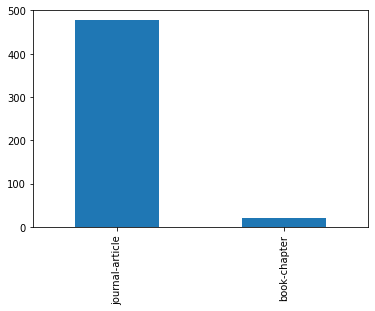

In [ ]:
type_count.plot(kind="bar")

In [ ]:
best_venues = publications["publication_venue"].value_counts()[:10]
best_venues

Scientometrics                                                       50
Sustainability                                                       30
International Journal Of Environmental Research And Public Health    14
Journal Of Informetrics                                               9
Journal Of Cleaner Production                                         9
The Canadian Journal Of Chemical Engineering                          8
Energies                                                              8
Technological Forecasting And Social Change                           6
Journal Of The Association For Information Science And Technology     6
Plos One                                                              5
Name: publication_venue, dtype: int64

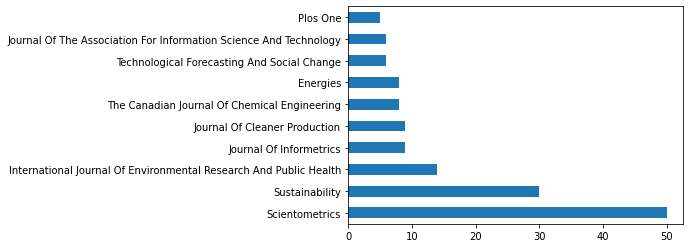

In [ ]:
best_venues.plot(kind="barh")

In [ ]:
publications_per_year = publications["publication_year"].value_counts()
publications_per_year

2021    209
2019    109
2018     83
2020     56
2017     24
2016     15
2014      3
2015      1
Name: publication_year, dtype: int64

In [ ]:
publications_per_year_sorted = publications_per_year.sort_index()
publications_per_year_sorted

2014      3
2015      1
2016     15
2017     24
2018     83
2019    109
2020     56
2021    209
Name: publication_year, dtype: int64

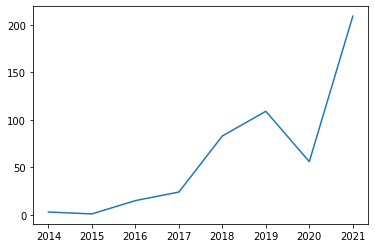

In [ ]:
publications_per_year_sorted.plot()